In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Loading data and getting info about dataset

In [ ]:
! kaggle datasets download sgpjesus/bank-account-fraud-dataset-neurips-2022

bank-account-fraud-dataset-neurips-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zipref = zipfile.ZipFile("bank-account-fraud-dataset-neurips-2022.zip")
zipref.extractall()
zipref.close()

### Choose Base.csv as a first data to work with

In [ ]:
df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [ ]:
len(df)

1000000

### Working with no missing data

In [ ]:
for col in df:
  print(f"Column name: {col}")
  print(f"Unique values for column {col}: \n\n")
  print(df[col].unique())
  print(f"\n There are {len(df[col].unique())} elements")
  print(f"\n ------------------- \n")

Column name: fraud_bool
Unique values for column fraud_bool: 


[1 0]

 There are 2 elements

 ------------------- 

Column name: income
Unique values for column income: 


[0.9 0.3 0.7 0.6 0.4 0.2 0.8 0.1 0.5]

 There are 9 elements

 ------------------- 

Column name: name_email_similarity
Unique values for column name_email_similarity: 


[0.16682773 0.29628601 0.04498549 ... 0.87940313 0.76211215 0.69745243]

 There are 998861 elements

 ------------------- 

Column name: prev_address_months_count
Unique values for column prev_address_months_count: 


[ -1  92 172  28 289  35  55 194 103  27  34  58  61  12  57  53  96  30
 111  26  86  64  18 234  97  56  54 125 110  65 217  93 126  25  33  80
  99  45 104  87  49  62 282 101 135 154  36  14  91  83  10  32  51 325
 333 159  11 318 109 152 288 102 336 202 225 118 115 319 201  47  37 241
  60  13 165  66  94  95  98  59  29  89  16 304 211 314  22  31  63 321
 141 112  52 151 142   9  50 173  90 307 106  78  24 195 310   8 146 284


### For data with enough data plot distribution 

In [ ]:
col_to_dis = []
for col in df:
  if len(df[col].unique()) > 20:
    col_to_dis.append(col)

col_to_dis

['name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'session_length_in_minutes']

### Getting only te 5% of data to visualize 

In [ ]:
df_visualize = df.sample(int(len(df) * 5/100))

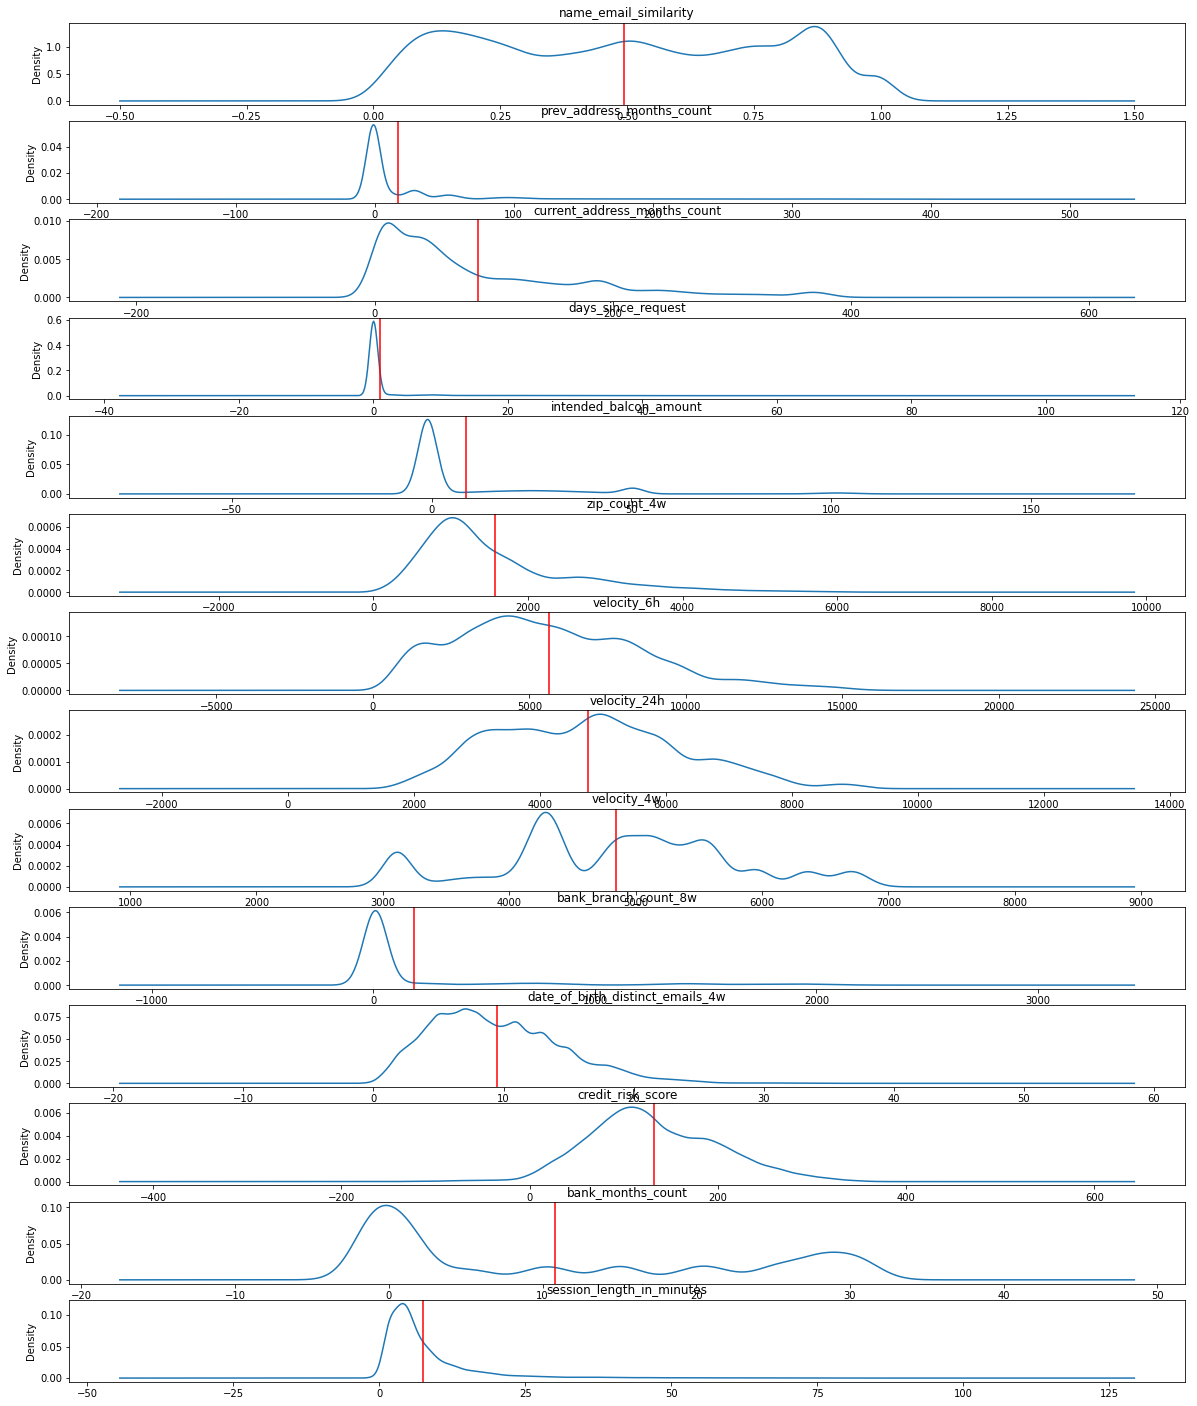

In [ ]:
fig, ax = plt.subplots(len(col_to_dis),1,figsize=(20,25))
i = 0
for col in col_to_dis:
  df_visualize[col].plot(kind="kde", ax=ax[i])
  ax[i].axvline(df_visualize[col].mean(), color="red")
  ax[i].set_title(f"{col}")
  i+=1

### Getting the correlactions between data

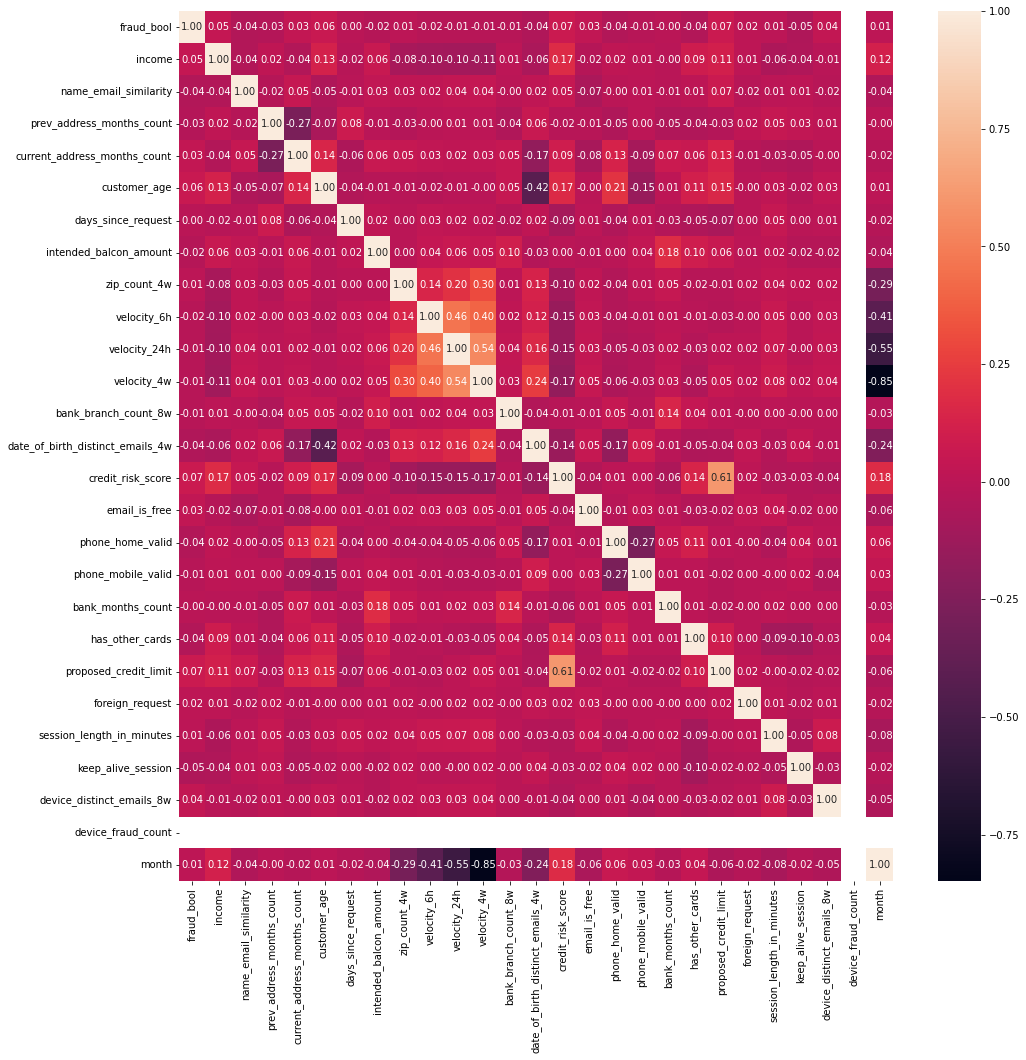

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")


### Conclusion from correlaction map:
- velocity_24 and month have high correlaction equal to -0.85, so we choose velocity_24 which have lower correlaction with another data,

- proposed_credit_limit and credit_risk_score have correlaction equal to 0.61, so we choose proposed_credit_limit which have lower corr with other data

## Model to consider 
We will try following models:
- LinearSVC
- SGD Classifier
- DeepLearning

In [ ]:
col_object = []
for col, col_type in zip(df,df.dtypes):
  if col_type == object:
    col_object.append(col)

col_object

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
etc = OneHotEncoder()
X_Encoded = etc.fit_transform(df[col_object]).toarray()
X_Encoded.shape

(1000000, 26)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
efc = MinMaxScaler()
df_to_normalize = df.drop(col_object, axis=1)
df_to_normalize = df_to_normalize.drop("fraud_bool", axis=1)
X_normalized = efc.fit_transform(df_to_normalize)
X_normalized.shape, type(X_normalized)

((1000000, 26), numpy.ndarray)

In [ ]:
label_all = df["fraud_bool"]
data_all = np.concatenate((X_Encoded, X_normalized), axis=1)
data_all.shape, label_all.shape

((1000000, 52), (1000000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_all,label_all,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import LinearSVC
model_linearsvc = LinearSVC(random_state=42,verbose=1)
model_linearsvc.fit(X_train,y_train)

[LibLinear]

LinearSVC(random_state=42, verbose=1)

In [ ]:
score_linearsvc = model_linearsvc.score(X_test,y_test)
score_linearsvc

0.9887766666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


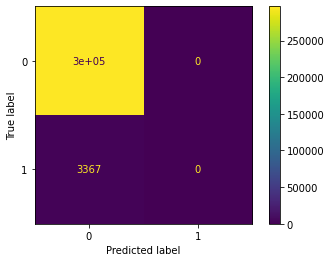

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_linearsvc, X_test, y_test)

### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model_sgdclassifier = SGDClassifier(random_state=42)
model_sgdclassifier.fit(X_train,y_train)


SGDClassifier(random_state=42)

In [ ]:
score_sgdclassifier = model_linearsvc.score(X_test,y_test)
score_sgdclassifier

0.9887766666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


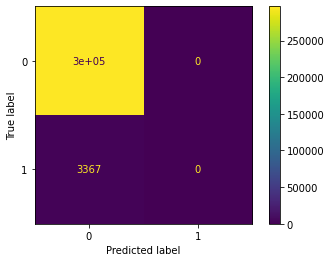

In [ ]:
plot_confusion_matrix(model_sgdclassifier,X_test,y_test)

### Deeplearning

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculating model accurancy, precision, recall and f1 score
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  ## Calculate model precision
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision * 100,
                   "recall":model_recall * 100,
                   "f1":model_f1 * 100}

  return model_results

In [ ]:

import tensorflow as tf
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X_train,y_train,epochs=5,steps_per_epoch=int(len(X_train) * 0.05))

Epoch 1/5
35000/35000 [==============================] - 77s 2ms/step - loss: 0.0488 - accuracy: 0.9889
Epoch 2/5
35000/35000 [==============================] - 76s 2ms/step - loss: 0.0472 - accuracy: 0.9891
Epoch 3/5
35000/35000 [==============================] - 76s 2ms/step - loss: 0.0470 - accuracy: 0.9891
Epoch 4/5
35000/35000 [==============================] - 75s 2ms/step - loss: 0.0469 - accuracy: 0.9891
Epoch 5/5
35000/35000 [==============================] - 76s 2ms/step - loss: 0.0467 - accuracy: 0.9891


In [ ]:
val_pred = model_1.predict(X_test)
model_1_preds = tf.squeeze(tf.round(val_pred))
model_1_results = calculate_results(y_true=y_test,
                                    y_pred=model_1_preds)
model_1_results

9375/9375 [==============================] - 12s 1ms/step


{'accuracy': 98.88233333333334,
 'precision': 98.40917155160403,
 'recall': 98.88233333333334,
 'f1': 98.37235946734874}

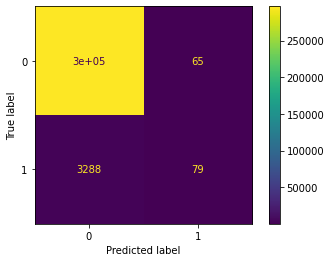

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_1_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()

## Working with huge data set dont let model to perform well, we will reduce our data set so ratio '1' and '0' will be similar

In [ ]:
def plot_history(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["accuracy"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("Accuracy")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()

In [ ]:
df_1 = df.loc[df['fraud_bool'] == 1]
df_0 = df.loc[df['fraud_bool'] == 0]
df_0 = df_0.sample(int(1.7*len(df_1)))

In [ ]:
df_1.shape, df_0.shape

((11029, 32), (18749, 32))

In [ ]:
df_total = pd.concat([df_0,df_1])
df_total.shape

(29778, 32)

In [ ]:
col_object = []
for col, col_type in zip(df,df.dtypes):
  if col_type == object:
    col_object.append(col)

col_object

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
etc = OneHotEncoder()
X_Encoded = etc.fit_transform(df_total[col_object]).toarray()
X_Encoded.shape

(29778, 26)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
efc = MinMaxScaler()
df_to_normalize = df_total.drop(col_object, axis=1)
df_to_normalize = df_to_normalize.drop("fraud_bool", axis=1)
X_normalized = efc.fit_transform(df_to_normalize)
X_normalized.shape, type(X_normalized)

((29778, 26), numpy.ndarray)

In [ ]:
label = df_total["fraud_bool"]
data = np.concatenate((X_Encoded, X_normalized), axis=1)
data.shape, label.shape

((29778, 52), (29778,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.3,random_state=42)

In [ ]:
tf.random.set_seed(42)
import tensorflow as tf
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

hist_2 = model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
652/652 [==============================] - 3s 3ms/step - loss: 0.4754 - accuracy: 0.7739
Epoch 2/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4599 - accuracy: 0.7855
Epoch 3/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.7886
Epoch 4/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4508 - accuracy: 0.7930
Epoch 5/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4492 - accuracy: 0.7938
Epoch 6/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4458 - accuracy: 0.7945
Epoch 7/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4456 - accuracy: 0.7942
Epoch 8/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4398 - accuracy: 0.7961
Epoch 9/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4386 - accuracy: 0.7988
Epoch 10/100
652/652 [==============================] - 2s 3ms/step - loss: 0.4369 - accura

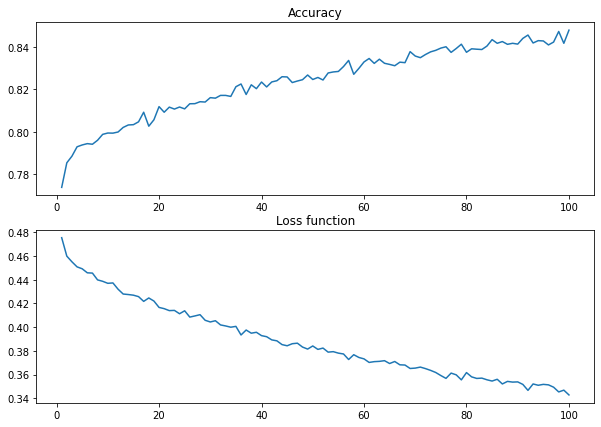

In [ ]:
plot_history(hist_2)

In [ ]:
val_pred = model_2.predict(X_test)
model_2_preds = tf.squeeze(tf.round(val_pred))
model_2_results = calculate_results(y_true=y_test,
                                    y_pred=model_2_preds)
model_2_results

280/280 [==============================] - 0s 1ms/step


{'accuracy': 79.04633982538617,
 'precision': 78.97055780695518,
 'recall': 79.04633982538617,
 'f1': 78.26636276454893}

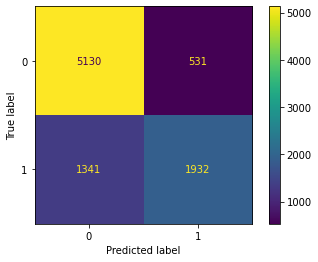

In [ ]:
cm = confusion_matrix(y_test, model_2_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()

In [ ]:
data_all = tf.convert_to_tensor(data_all)
label_all = tf.convert_to_tensor(label_all)
val_pred = model_2.predict(data_all)
model_2_preds_all_data = tf.squeeze(tf.round(val_pred))
model_2_results_all_data = calculate_results(y_true=label_all,
                                    y_pred=model_2_preds_all_data)
model_2_results_all_data

31250/31250 [==============================] - 45s 1ms/step


{'accuracy': 90.1218,
 'precision': 98.59964809756266,
 'recall': 90.1218,
 'f1': 93.86426721175721}

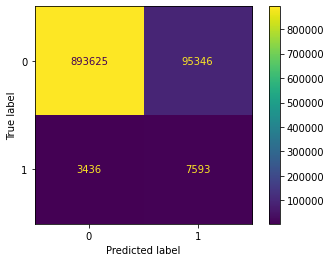

In [ ]:
cm = confusion_matrix(label_all, model_2_preds_all_data, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()